# Lab 1

In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install
import copy

In [2]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
    image = cv2.imread(path)
    filename = path.split("/")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

spiderman.jpg
wonderwoman.jpg
venom.jpg
wonderwoman2.jpg
ironman.jpg
wolverine.jpg
magnetto.jpg
hulk.jpg


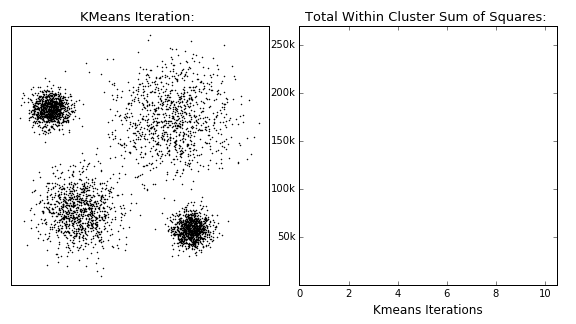

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


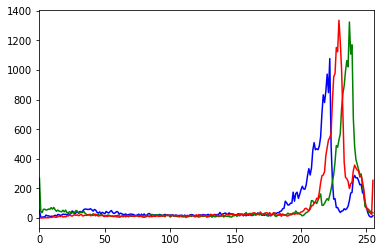

In [3]:
# Input data
data = [images["wonderwoman.jpg"].reshape((-1,3)) for k in images.keys()]

img = cv2.imread('./data/wonderwoman.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

2. The objective function, sometimes called a distortion measure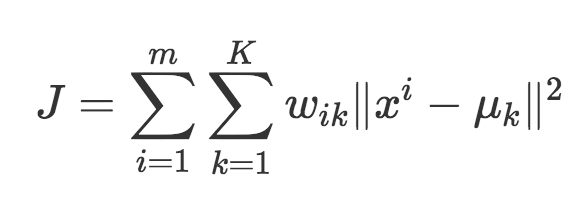

3. Consider first the determination of the rnk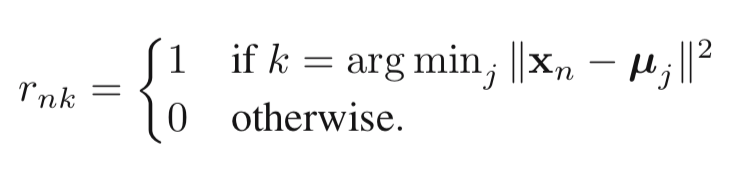

4. The denominator is equal to the number of points assigned to cluster k, and so this result has a simple interpretation, namely set μk equal to the mean of all of the data points xn assigned to cluster k.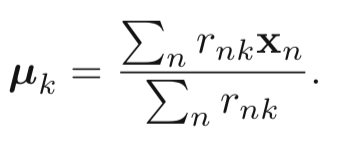

In [4]:
class KMeans():
    def __init__(self, k, iterations = 10):
        self.k = k # Amount of classes
        self.iterations = iterations
    
    #Initialize centroids    
    def initialize_centroids(self, data):      
        return data[np.random.permutation(data.shape[0])[:self.k]]
    
    #Compute distance between data points and all centroids
    def find_distance(self, data_points, centroids):
        objective_function = np.zeros((data_points.shape[0], self.k)) # 22500 x 2/3/10
        for k in range(self.k):
            objective_function[:,k] = np.square(np.linalg.norm(data_points - centroids[k,:], axis = 1))
        return objective_function
    
    #Assign each data point to the closest cluster
    def closest_cluster(self, distances):
        return np.argmin(distances, axis = 1)
    
    #Compute the centroids
    def find_centroids(self, data_points, indicators):
        centroids = np.zeros((self.k, data_points.shape[1])) # 2/3/10 x 3
        for k in range(self.k): 
            centroids[k,:] = np.mean(data_points[indicators == k,:], axis = 0)
        return centroids
    
    def fit(self, data):
        self.data = data
        self.centroids = self.data[np.random.permutation(data.shape[0])[:self.k]]
        for i in range(self.iterations):
            previous_centroids = self.centroids
            self.indicators = self.closest_cluster(self.find_distance(self.data, previous_centroids))
            self.centroids = self.find_centroids(self.data, self.indicators)
            if np.any(previous_centroids == self.centroids): break
    
    def classify(self):
        centroids = self.closest_cluster(self.find_distance(self.data, self.centroids))
        segmented = self.data
        for i in range(len(self.data)):
            segmented[i] = self.centroids[centroids][i]   
        return segmented

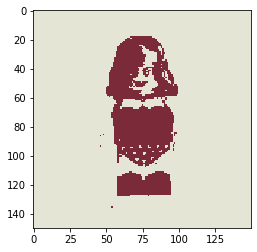

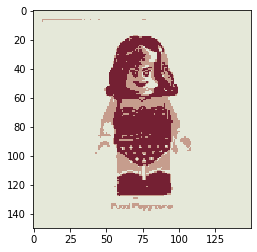

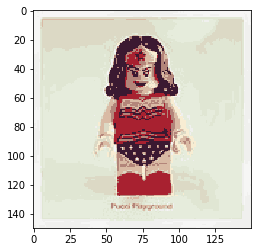

In [5]:
for k in [2, 3, 10]:
    kmeans = KMeans(k)
    kmeans.fit(copy.deepcopy(data[0]))

    plt.figure()
    plt.imshow(kmeans.classify().reshape(150, 150, 3))   